The accuracy score for the training set is 33.33333333333333 %


ValueError: too many values to unpack (expected 2)

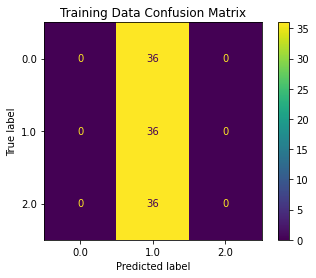

In [126]:
#all the imports for project stage 
from skimage.morphology import convex_hull_image
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image,ImageFilter,ImageEnhance
from numpy import asarray
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import os, os.path
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from scipy import ndimage as ndi
from skimage import feature


folderTraining= r"C:\Users\andy\Downloads\Lego_dataset_2\Lego_dataset_2\training"   # folder pathway for the training data
folderTesting= r"C:\Users\andy\Downloads\Lego_dataset_2\Lego_dataset_2\testing"     # folder pathway for the testing data
width = int(480/8)
length = int(640/8)                                                        # desired length of use for each image
model = training(folderTraining,width,length)                      # call to the training function and returns Logistic regression model with the inputted training data set
testing(folderTesting,model,width,length)                          # call to the testing fucntions which returns the confustion matrix for the testing data. 

In [125]:
def training(path,width,length):                                                                                          #method heading training, takes in the parameters of folder pathway, width and length of the image
    images = []
    edges = []
    y_edge_train = []
    pi = math.pi
    directory = os.listdir(training)
    def edgeDetection(image):
        edges = cv2.Canny(image,0,200)
        return [image,edges]
    def verticalize_img(img):
      # Get the coordinates of the points of interest:
        X = np.array(np.where(img > 0)).T
                                 # Perform a PCA and compute the angle of the first principal axes
        pca = PCA(n_components=2).fit(X)
        angle = np.arctan2(*pca.components_[0])
        # Rotate the image by the computed angle:
        rotated_img = rotate(img,angle/pi*180-90)
        return rotated_img 
    
    for i in range(len(directory)):
        path = training + 'cir_' + str(i+1) + '.png'
        if os.path.exists(path) == 1:
            image = cv2.imread(path,0)[0:908,0:908]
     #image_size = image.size
     #print(image_size)
            rotated_image = verticalize_img(image)
     #plt.imshow(rotated_image,cmap='gray')
     #plt.show()
 
             normalized_image = rotated_image[0:908,0:908]
 #plt.imshow(normalized_image,cmap='gray')
 #plt.show()
 
             images.append(edgeDetection(normalized_image)[0])
             edges.append(edgeDetection(normalized_image)[1])
             y_edge_train.append(0)
 
    for i in range(len(directory)):
        path = training + 'rec_' + str(i+1) + '.png'
        if os.path.exists(path) == 1:
            image = cv2.imread(path,0)[0:908,0:908]
                 #image_size = image.size
                 #print(image_size)
            rotated_image = verticalize_img(image)
                 #plt.imshow(rotated_image,cmap='gray')
                 #plt.show()

            normalized_image = rotated_image[0:908,0:908]
                 #plt.imshow(normalized_image,cmap='gray')
                 #plt.show()

            images.append(edgeDetection(normalized_image)[0])
            edges.append(edgeDetection(normalized_image)[1])
            y_edge_train.append(1)
 
    for i in range(len(directory)):
         path = training + 'squ_' + str(i+1) + '.png'
        if os.path.exists(path) == 1:
            image = cv2.imread(path,0)[0:908,0:908]
             #image_size = image.size
             #print(image_size)
            rotated_image = verticalize_img(image)
             #plt.imshow(rotated_image,cmap='gray')
             #plt.show()

            normalized_image = rotated_image[0:908,0:908]
             #plt.imshow(normalized_image,cmap='gray')
             #plt.show()

            images.append(edgeDetection(normalized_image)[0])
            edges.append(edgeDetection(normalized_image)[1])
            y_edge_train.append(2)
            y_edge_train = np.array(y_edge_train)
            y_edge_train.reshape(-1,1)
            
print('y_edge_train length = ')
print(len(y_edge_train))
print('y_edge_train = ')
print(y_edge_train)
#print(edges)
histograms_all = []
for count,value in enumerate(edges):
     image_pixels = np.array(value)
     width = len(image_pixels)
 #this is a long loop. print(count) is there so we know it isn't frozen
 print(count)
 histogram_single_image = []
 for i in range(width):
 histogram_single_image.append(0)
 for j,row in enumerate(image_pixels):
 for i in row:
 if(i.any()):
 histogram_single_image[j] = histogram_single_image[j] + 1
 histogram_single_image = np.asarray(histogram_single_image)
 histograms_all.append(histogram_single_image)
 #if (count > 2):
 #break
histograms_all = np.asarray(histograms_all)
#np.concatenate(histograms_all, axis=0 )
np.vstack(histograms_all)
print('histograms_all length = ')
print(len(histograms_all))
print('histograms_all = ')
print(histograms_all)
edge_model = LogisticRegression(max_iter = 1000)
edge_model.fit(histograms_all,y_edge_train)
edge_pred = edge_model.predict(histograms_all)
print('Accuracy Score of the training folder: ')
print(accuracy_score(y_edge_train,edge_pred))
print('Confusion Matrix of the training folder')
print(confusion_matrix(y_edge_train,edge_pred))


In [124]:
def testing(path, model, width , length):                                                           #method heading testing, takes in the parameters of folder pathway, width and length of the image, and the LogisticRegression model from the training dataset
        imgData_test, class_label_test = getData(path,width,length) 
                               #Recieve Image Data and class label as matrix of the testing dataset from getData()
        class_label_pred = model.predict(imgData_test)                                               #List of predicted values from the input from testing data
        acc_score = accuracy_score(class_label_test,class_label_pred) * 100                         #Calculate the accuracy score from the given testing data set
        print(f'The accuracy score for the testing set is {acc_score} %')                           #print the accuracy score
        conf_matrix = confusion_matrix(class_label_test,class_label_pred)                           #calculate the confustion matrix from the test class labels to the predicted class labels
        disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=model.classes_)   #display the confustion matrix as an formatted image with true label vertically and the predicated label horizontally
        disp.plot()                                                                                 #plot the confusion matrix
        disp.ax_.set_title('Testing Data Confusion Matrix')                                         # set the title for the confusion matrix                                                                           
        return accuracy_score, confusion_matrix                                                     # return the value for the accuracy score and the confusion matrix

In [123]:
def process_image(image_array,edge_thresh,peak_thresh,width,length):
    im_width = width
    im_length = length
    # increase contrast by making image occupy the whole grayscale 0 to 255
    image_array = (image_array-np.min(image_array))*255/(np.max(image_array)-np.min(image_array))
    # find edges using edge filter
    im = Image.fromarray(image_array.reshape(im_width,im_length)).convert('L')
      
    edges_image = im.filter(ImageFilter.FIND_EDGES)
    edges_array = np.asarray(edges_image)
    # edge filter produces artificial edges at the boundary, we remove them next
    edges_array_scaled = edges_array.copy()[1:im_width-1,1:im_length-1]
    # threshold edges to keep only prominent ones
    edges_array_scaled[edges_array_scaled < edge_thresh,] = 0 
   
    # engineer features
    edges_v = np.sum(edges_array_scaled,axis=0).astype(float)
    edges_h = np.sum(edges_array_scaled,axis=1).astype(float)
    # high pass filter, to remove mean from edge features 
    #(we are interested in fast variations only)
    # we do this by subtracting the mean in windows of length M
    M = 5
    for i in range(len(edges_v)-M):
        edges_v[i] = edges_v[i]-np.mean(edges_v[i:i+M])
        edges_v[-M:]=0
    for i in range(len(edges_h)-M):
        edges_h[i] = edges_h[i]-np.mean(edges_h[i:i+M])
        edges_h[-M:]=0
    # find peak and noise standard deviation in horizontal and vertical edge vectors
    peak_v = np.max(np.abs(edges_v))
    peak_h = np.max(np.abs(edges_h))
    noise_v = edges_v.copy()[np.abs(edges_v) < peak_thresh*peak_v]
    noise_h = edges_h.copy()[np.abs(edges_h) < peak_thresh*peak_h]    
    sd_v = np.sqrt(np.var(noise_v))
    sd_h = np.sqrt(np.var(noise_h))
    x = np.array([peak_v/sd_v,peak_h/sd_h]).reshape(1,-1)
    return x

In [122]:
def get_data(folder,im_width,im_length,label): #function call to put image data and class in x
                                              #and y respectively. Folder is the path to the training data, im_width is the 
                                              #width used to resize the image, im_length is the length used to resize the image
                                              #label is the class of the image, n_samples is where we want to stop reading the 
                                              #data in the folder, start_samples is where we want to start reading the data in
                                              #the folder. 
                        
    file_names = os.listdir(folder)           #create an array of all of the file names within the path folder

    for i in range(start_samples,n_samples): #creates a for loop that runs while i is in range between start and n_samples
        path1 = folder + '/' +file_names[i]        #path1 is the path that shows the path to each individual file within the range
        im=Image.open(path1).convert('L')     #creates a variable im, that holds a grayscale image 
        im1 = ImageEnhance.Sharpness(im)      #Defines the image transformation for altering image sharpness         
        im1 = im1.enhance(20)                 #Sharpens the image by a factor of 20
        im1 = ImageEnhance.Contrast(im1)      #Defines the image transformation for altering image contrast
        im1 = im1.enhance(0.865)              #Decreases the Contrast by a factor of 0.865
        im1 = ImageEnhance.Brightness(im1)    #Defines the image transformation for altering image brightness
        im1 = im1.enhance(1.25)               #Brightens the image by a factor of 1.25
        im1 = im1.resize((im_width,im_length))#Resizes the image to 64x64
        image = ndi.rotate(im1, 1,reshape=False, mode='constant') #continuously rotate the previous image by 1 degree without reshaping it
        image = ndi.gaussian_filter(image, 1.75) #Applies a gaussian filter to the image. The order is 1.75
        edges2 = feature.canny(image, sigma=1.25)#Applies the canny edge detector. Sigma (Standard Deviation of Filter = 1.25)
        im = Image.fromarray(edges2.reshape(im_width,im_length)).convert('L') #converts image data back into an image
        width, length = im.size                #retrieve the dimensions of that image mentioned
        left = width/10
        top = length/10
        right = width*0.9
        bottom = length *0.9
        im1=im.crop((left,top,right,bottom))   #crops the image by factors/variables determined above
        im1 = im1.resize((im_width,im_length))#Resizes the cropped image to 64x64
        im_array = asarray(im1)               #converts image data to array
        chull = convex_hull_image(im_array)   #Fills in detected border with white space
        edges2 = feature.canny(chull, sigma=1.25) #Applies the canny edge detector. Sigma (Standard Deviation of Filter = 1.25)
        n_white_pix = np.sum(chull == True) #Counts how many white pixels exist in the filled in border
        x1[i,0]= n_white_pix #Stores pixel count into training matrix
      #  im_array = asarray(chull)  
      #  x[i,:] = im_array.reshape(1,-1)
      #  y[i,0] = classes[label]
    return x,y,x1

In [90]:
                                                    
def getData(dataFolder,width, length):                #method heading getData, takes in the parameters of folder pathway, width and length of the image
    data_path= os.listdir(dataFolder)                 #list of the file names in the folder of interest such as training and testing                       
    imgData= np.empty((len(data_path),width*length))
    x1 = np.empty(len(imgData)).reshape(-1,1)                     #creates an empty array of features for the image Data
    class_label = np.empty((len(data_path),1))        #creates an empty array of labels for the image Data                
    for i in range (len(data_path)):                  #a loop that iterates through the items in the folder of interest and appends a reshaped data array to the image data, which will be used as the X_train, X_test              
        pathway = dataFolder + '/' + data_path[i]     #creates a string for the pathway for each image    
        image = Image.open(pathway).convert('L')      #Uses the library Image to instantiate the image and converts it to greyscale
        image= image.resize((width,length)) 
        image = ImageEnhance.Contrast(image).enhance(3.6).convert('L')
        image = ImageEnhance.Brightness(image).enhance(4.42)
        image = ndi.rotate(image, 1, reshape = False, mode = 'constant')                                              # resizes the image to the width and length of users choice          
        image = asarray(image)                        #Converts the image to an array of data values           
        imgData[i,:] = image.reshape(1,-1)            # Converts and reshapes features of the image data to 1D array    
        chull = convex_hull_image(image) #Fills in detected border with white space 
        edges2 = feature.canny (chull, sigma=1.25) #Applies the canny edge detector. 
        n_white_pix=np.sum(chull==True) #Counts how many white pixels exist in the 
        x1[i,0]= n_white_pix #Stores pixel count into training matrix 
        
        
        #Since labels are in string value, we need to change it to a int value to name the labels
        # 0  means Circle
        # 1 means Rectangle
        # 2 means Square
        if 'cir' in data_path[i]:
              class_label[i,0] = 0
        if 'rec' in data_path[i]:
              class_label[i,0] = 1
        if 'squ' in data_path[i]:
              class_label[i,0] = 2
    return imgData,class_label,x1                        #returns value for the reshaped image data and the integer converted class label describing each lego brick

In [89]:
def get_data_train(folder,im_width,im_length,label,n_samples,start_samples): #function call to put image data and class in x
                                              #and y respectively. Folder is the path to the training data, im_width is the 
                                              #width used to resize the image, im_length is the length used to resize the image
                                              #label is the class of the image, n_samples is where we want to stop reading the 
                                              #data in the folder, start_samples is where we want to start reading the data in
                                              #the folder. 
                        
    file_names = os.listdir(folder)           #create an array of all of the file names within the path folder

    for i in range(start_samples,n_samples): #creates a for loop that runs while i is in range between start and n_samples
        path1 = folder + file_names[i]        #path1 is the path that shows the path to each individual file within the range
        im=Image.open(path1).convert('L')     #creates a variable im, that holds a grayscale image 
        im1 = ImageEnhance.Sharpness(im)      #Defines the image transformation for altering image sharpness         
        im1 = im1.enhance(20)                 #Sharpens the image by a factor of 20
        im1 = ImageEnhance.Contrast(im1)      #Defines the image transformation for altering image contrast
        im1 = im1.enhance(0.865)              #Decreases the Contrast by a factor of 0.865
        im1 = ImageEnhance.Brightness(im1)    #Defines the image transformation for altering image brightness
        im1 = im1.enhance(1.25)               #Brightens the image by a factor of 1.25
        im1 = im1.resize((im_width,im_length))#Resizes the image to 64x64
        image = ndi.rotate(im1, 1,reshape=False, mode='constant') #continuously rotate the previous image by 1 degree without reshaping it
        image = ndi.gaussian_filter(image, 1.75) #Applies a gaussian filter to the image. The order is 1.75
        edges2 = feature.canny(image, sigma=1.25)#Applies the canny edge detector. Sigma (Standard Deviation of Filter = 1.25)
        im = Image.fromarray(edges2.reshape(im_width,im_length)).convert('L') #converts image data back into an image
        width, length = im.size                #retrieve the dimensions of that image mentioned
        left = width/10
        top = length/10
        right = width*0.9
        bottom = length *0.9
        im1=im.crop((left,top,right,bottom))   #crops the image by factors/variables determined above
        im1 = im1.resize((im_width,im_length))#Resizes the cropped image to 64x64
        im_array = asarray(im1)               #converts image data to array
        chull = convex_hull_image(im_array)   #Fills in detected border with white space
        edges2 = feature.canny(chull, sigma=1.25) #Applies the canny edge detector. Sigma (Standard Deviation of Filter = 1.25)
        n_white_pix = np.sum(chull == True) #Counts how many white pixels exist in the filled in border
        x1[i,0]= n_white_pix #Stores pixel count into training matrix
      #  im_array = asarray(chull)  
      #  x[i,:] = im_array.reshape(1,-1)
      #  y[i,0] = classes[label]
    return x,y,x1

array([4730.])

In [105]:
im=Image.open(path1).convert('L')     #creates a variable im, that holds a grayscale image 
        im1 = ImageEnhance.Sharpness(im)      #Defines the image transformation for altering image sharpness         
        im1 = im1.enhance(20)                 #Sharpens the image by a factor of 20
        im1 = ImageEnhance.Contrast(im1)      #Defines the image transformation for altering image contrast
        im1 = im1.enhance(0.865)              #Decreases the Contrast by a factor of 0.865
        im1 = ImageEnhance.Brightness(im1)    #Defines the image transformation for altering image brightness
        im1 = im1.enhance(1.25)               #Brightens the image by a factor of 1.25
        im1 = im1.resize((width,length))#Resizes the image to 64x64
        image = ndi.rotate(im1, 1,reshape=False, mode='constant') #continuously rotate the previous image by 1 degree without reshaping it
        image = ndi.gaussian_filter(image, 1.75) #Applies a gaussian filter to the image. The order is 1.75
        edges2 = feature.canny(image, sigma=1.25)#Applies the canny edge detector. Sigma (Standard Deviation of Filter = 1.25)
        im = Image.fromarray(edges2.reshape(width,length)).convert('L') #converts image data back into an image
        width, length = im.size                #retrieve the dimensions of that image mentioned
        left = width/10
        top = length/10
        right = width*0.9
        bottom = length *0.9
        im1=im.crop((left,top,right,bottom))   #crops the image by factors/variables determined above
        im1 = im1.resize((width,length))#Resizes the cropped image to 64x64
        im_array = asarray(im1)               #converts image data to array
        chull = convex_hull_image(im_array)   #Fills in detected border with white space
        edges2 = feature.canny(chull, sigma=1.25) #Applies the canny edge detector. Sigma (Standard Deviation of Filter = 1.25)
        n_white_pix = np.sum(chull == True) #Counts how many white pixels exist in the filled in border
        x1[i,0]= n_white_pix #Stores pixel count into training matrix
         left = width/10
        top = length/10
        right = width*0.9
        bottom = length *0.9
        im1=im.crop((left,top,right,bottom))   #crops the image by factors/variables determined above
        im1 = im1.resize((width,length))#Resizes the cropped image to 64x64

array([[3737.],
       [3904.],
       [3735.],
       [3985.],
       [3617.],
       [4002.],
       [3634.],
       [4023.],
       [3656.],
       [3820.],
       [3750.],
       [4085.],
       [3859.],
       [4023.],
       [3667.],
       [3642.],
       [3575.],
       [4004.],
       [3698.],
       [3994.],
       [3712.],
       [3760.],
       [3706.],
       [4152.],
       [3771.],
       [3928.],
       [3703.],
       [4059.],
       [3678.],
       [3816.],
       [3650.],
       [3943.],
       [3691.],
       [3978.],
       [3769.],
       [4176.],
       [3906.],
       [4090.],
       [3936.],
       [3989.],
       [3856.],
       [3979.],
       [4183.],
       [3632.],
       [3991.],
       [3589.],
       [3826.],
       [3421.],
       [4254.],
       [3697.],
       [4155.],
       [4026.],
       [3896.],
       [3781.],
       [4118.],
       [3698.],
       [3872.],
       [3812.],
       [3992.],
       [3726.],
       [3974.],
       [3792.],
       [

In [ ]:
P_train = len(imgData_train[:,0])
    ET = 64
    PT = 0.5
    edge_features_train = np.empty((P_train,2))
                               
    for i in range(P_train):
        edge_features_train[i,:] = process_image(edge[i,:],ET,PT,width,length)  #ravels the class_label_train input as a 1-D array, containing the elements of the input